In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

pd.set_option('display.max_columns', None)

### Build the dataset with the six test from the simulation data

In [7]:
df = pd.DataFrame()
for test in range(1, 7):
    file = f"simulations_data/simulation_wind/Wind{test}/error.csv"
    temp_data = pd.read_csv(file)
    temp_data = temp_data.rename(columns={
        "%time": f"{test}_time_percent",
        "field.errorX": f"{test}_error_X",
        "field.errorY": f"{test}_error_Y",
        "field.errorT": f"{test}_error_Angle"
    })
    temp_data = temp_data.drop(columns=["field.errorS"])
    df = pd.concat([df, temp_data], axis=1)
df

,1_time_percent,1_error_X,1_error_Y,1_error_Angle,2_time_percent,2_error_X,2_error_Y,2_error_Angle,3_time_percent,3_error_X,3_error_Y,3_error_Angle,4_time_percent,4_error_X,4_error_Y,4_error_Angle,5_time_percent,5_error_X,5_error_Y,5_error_Angle,6_time_percent,6_error_X,6_error_Y,6_error_Angle
0,2.817537e+12,165.406860,112.532249,-37.135151,2.792253e+12,136.607895,66.360245,-36.137890,2.795981e+12,166.808792,37.174133,-38.715382,2.793537e+12,153.018341,18.841827,-37.481899,2.795545e+12,145.687134,14.428772,-36.377716,2831453000000,139.788254,-6.930649,-33.987568
1,2.817637e+12,167.445312,113.975128,-37.147095,2.792345e+12,136.552307,66.358673,-36.116817,2.796053e+12,168.134949,37.538925,-38.695744,2.793657e+12,153.671051,18.952454,-37.403046,2.795657e+12,146.841003,14.868301,-36.337376,2831569000000,139.838074,-6.820221,-33.938217
2,2.817733e+12,169.483780,115.417999,-37.159042,2.792441e+12,136.496719,66.357101,-36.095741,2.796261e+12,169.461105,37.903732,-38.676105,2.793745e+12,154.323776,19.063080,-37.324192,2.795745e+12,147.994873,15.307831,-36.297031,2831697000000,139.887909,-6.709793,-33.888863
3,2.817861e+12,171.522247,116.860878,-37.170990,2.792549e+12,136.441132,66.355530,-36.074665,2.796345e+12,170.787247,38.268524,-38.656471,2.793861e+12,154.976501,19.173706,-37.245338,2.795837e+12,149.148743,15.747375,-36.256687,2831793000000,139.937729,-6.599365,-33.839508
4,2.817941e+12,173.560699,118.303749,-37.182938,2.792645e+12,136.385544,66.353958,-36.053593,2.796429e+12,172.113403,38.633316,-38.636833,2.793945e+12,155.629227,19.284332,-37.166485,2.795925e+12,150.302612,16.186905,-36.216347,2831873000000,139.987564,-6.488953,-33.790157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2849997000000,13.608063,6.705078,-41.241192
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850065000000,13.375793,8.201538,-41.115150
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850153000000,11.115021,10.715134,-40.492508
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850265000000,11.390533,10.273819,-41.592968


In [8]:
df.to_csv("./data/controller_error_wind.csv", index=False)

### Controllers errors dataset of the simulation

This analysis is made to determine the error of the simulation in six different test that were made adding different forces of wind to the simulation.

In [9]:
error_file = "./data/controller_error_wind.csv"
data = pd.read_csv(error_file)

In [10]:
controller_times = {}

with open("./data/controller_time_wind.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        controller_times[row[0]] = float(row[1])

print(controller_times)

{'1': 18.296, '2': 17.76, '3': 20.62, '4': 20.332, '5': 21.076, '6': 22.356}


In [11]:
for test, test_time in controller_times.items():    

    first_val_tstamp = data[test+"_time_percent"][0]
    last_val_tstamp = data[test+"_time_percent"][data.apply(lambda column: column.dropna().index[-1])[test+"_time_percent"]]
    
    m = test_time / (last_val_tstamp - first_val_tstamp)
    b = test_time - m * last_val_tstamp
    
    data[test+"_time"] = m * data[test+"_time_percent"] + b

data = data.reindex(columns=sorted(data.columns))

In [12]:
data

,1_error_Angle,1_error_X,1_error_Y,1_time,1_time_percent,2_error_Angle,2_error_X,2_error_Y,2_time,2_time_percent,3_error_Angle,3_error_X,3_error_Y,3_time,3_time_percent,4_error_Angle,4_error_X,4_error_Y,4_time,4_time_percent,5_error_Angle,5_error_X,5_error_Y,5_time,5_time_percent,6_error_Angle,6_error_X,6_error_Y,6_time,6_time_percent
0,-37.135151,165.406860,112.532249,0.000000,2.817537e+12,-36.137890,136.607895,66.360245,4.547474e-13,2.792253e+12,-38.715382,166.808792,37.174133,0.000000,2.795981e+12,-37.481899,153.018341,18.841827,0.000000,2.793537e+12,-36.377716,145.687134,14.428772,0.000000,2.795545e+12,-33.987568,139.788254,-6.930649,0.000000,2831453000000
1,-37.147095,167.445312,113.975128,0.123488,2.817637e+12,-36.116817,136.552307,66.358673,1.126841e-01,2.792345e+12,-38.695744,168.134949,37.538925,0.088120,2.796053e+12,-37.403046,153.671051,18.952454,0.141293,2.793657e+12,-36.337376,146.841003,14.868301,0.141687,2.795657e+12,-33.938217,139.838074,-6.820221,0.137153,2831569000000
2,-37.159042,169.483780,115.417999,0.242037,2.817733e+12,-36.095741,136.496719,66.357101,2.302676e-01,2.792441e+12,-38.676105,169.461105,37.903732,0.342688,2.796261e+12,-37.324192,154.323776,19.063080,0.244907,2.793745e+12,-36.297031,147.994873,15.307831,0.253013,2.795745e+12,-33.888863,139.887909,-6.709793,0.288495,2831697000000
3,-37.170990,171.522247,116.860878,0.400102,2.817861e+12,-36.074665,136.441132,66.355530,3.625490e-01,2.792549e+12,-38.656471,170.787247,38.268524,0.445494,2.796345e+12,-37.245338,154.976501,19.173706,0.381490,2.793861e+12,-36.256687,149.148743,15.747375,0.369399,2.795837e+12,-33.839508,139.937729,-6.599365,0.402001,2831793000000
4,-37.182938,173.560699,118.303749,0.498892,2.817941e+12,-36.053593,136.385544,66.353958,4.801324e-01,2.792645e+12,-38.636833,172.113403,38.633316,0.548300,2.796429e+12,-37.166485,155.629227,19.284332,0.480395,2.793945e+12,-36.216347,150.302612,16.186905,0.480725,2.795925e+12,-33.790157,139.987564,-6.488953,0.496590,2831873000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-41.241192,13.608063,6.705078,21.925622,2849997000000
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-41.115150,13.375793,8.201538,22.006022,2850065000000
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-40.492508,11.115021,10.715134,22.110070,2850153000000
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-41.592968,11.390533,10.273819,22.242494,2850265000000


In [13]:
controllers = pd.DataFrame(columns=["Time", "Force [N]", "Error_X", "Error_Y", "Error_Angle"])

for test in controller_times:
    control = pd.DataFrame(columns=["Time", "Force [N]", "Error_X", "Error_Y", "Error_Angle"])
    row_num = data.apply(lambda column: column.dropna().index[-1])[test+"_time"]
    
    control["Time"] = data[test+"_time"][0:row_num+1]
    control["Error_X"] = data[test+"_error_X"][0:row_num+1]
    control["Error_Y"] = data[test+"_error_Y"][0:row_num+1]
    control["Error_Angle"] = data[test+"_error_Angle"][0:row_num+1]
    control["Force [N]"] = test
    
    controllers = controllers.append(control, ignore_index = True)

    del control

controllers

,Time,Force [N],Error_X,Error_Y,Error_Angle
0,0.000000,1,165.406860,112.532249,-37.135151
1,0.123488,1,167.445312,113.975128,-37.147095
2,0.242037,1,169.483780,115.417999,-37.159042
3,0.400102,1,171.522247,116.860878,-37.170990
4,0.498892,1,173.560699,118.303749,-37.182938
...,...,...,...,...,...
1009,21.925622,6,13.608063,6.705078,-41.241192
1010,22.006022,6,13.375793,8.201538,-41.115150
1011,22.110070,6,11.115021,10.715134,-40.492508
1012,22.242494,6,11.390533,10.273819,-41.592968


Text(0.5, 0.98, 'Controller Errors with Low Illumination and Wind Disturbances')

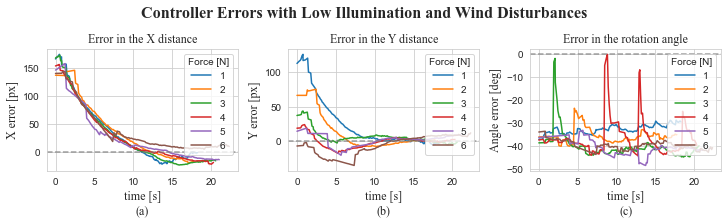

In [15]:
timesfont = {'fontname':'Times New Roman'}

sns.set_style('whitegrid')

fig = plt.figure(constrained_layout=True, figsize=(10,3))

gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

x = sns.lineplot(data=controllers, x="Time", y="Error_X",
             hue="Force [N]", ax=ax1)
y = sns.lineplot(data=controllers, x="Time", y="Error_Y",
             hue="Force [N]", ax=ax2)
angle = sns.lineplot(data=controllers, x="Time", y="Error_Angle",
             hue="Force [N]", ax=ax3)

x.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)
y.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)
angle.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)


x.set_title("Error in the X distance", fontsize=12, **timesfont)
y.set_title("Error in the Y distance", fontsize=12, **timesfont)
angle.set_title("Error in the rotation angle", fontsize=12, **timesfont)

x.set_xlabel("time [s]\n(a)", fontsize=12, **timesfont)
y.set_xlabel("time [s]\n(b)", fontsize=12, **timesfont)
angle.set_xlabel("time [s]\n(c)", fontsize=12, **timesfont)

x.set_ylabel("X error [px]", fontsize=12, **timesfont)
y.set_ylabel("Y error [px]", fontsize=12, **timesfont)
angle.set_ylabel("Angle error [deg]", fontsize=12, **timesfont)


fig.suptitle('Controller Errors with Low Illumination and Wind Disturbances', fontsize=16, fontweight='bold', **timesfont)